<a href="https://colab.research.google.com/github/roscoekerby/google-colab/blob/main/Corner_Detection_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Top Left: (0, 24)
Top Right: (1658, 35)
Bottom Left: (7, 381)
Bottom Right: (1658, 390)


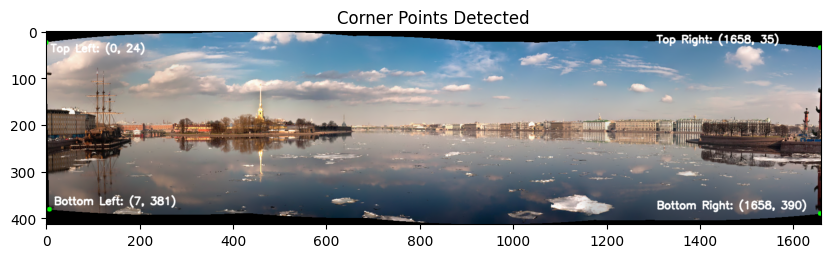

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = '/content/stitched_image.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold
_, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
contour_img = image.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

# Get the corner points using contour approximation
approx_corners = []
for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    approx_corners.extend(approx)

# Determine image dimensions
height, width, _ = image.shape

# Categorize corner points
corners = {'top_left': None, 'top_right': None, 'bottom_left': None, 'bottom_right': None}
for point in approx_corners:
    coord = tuple(point[0])
    x, y = coord

    if x < width / 2 and y < height / 2:
        corners['top_left'] = coord
    elif x > width / 2 and y < height / 2:
        corners['top_right'] = coord
    elif x < width / 2 and y > height / 2:
        corners['bottom_left'] = coord
    elif x > width / 2 and y > height / 2:
        corners['bottom_right'] = coord

# Draw the corner points on the image and print them to console
for key, coord in corners.items():
    if coord:
        cv2.circle(image, coord, 5, (0, 255, 0), -1)
        text = f'{key.replace("_", " ").title()}: {coord}'
        # Adjust text color based on background color
        (b, g, r) = image[coord[1], coord[0]]
        text_color = (255, 255, 255) if (b + g + r) / 3 < 128 else (0, 0, 0)

        # Determine the position for the text
        text_x = coord[0] + 10 if coord[0] + 10 < width - 200 else coord[0] - 350
        text_y = coord[1] - 10 if coord[1] - 10 > 20 else coord[1] + 20

        cv2.putText(image, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.75, text_color, 2, cv2.LINE_AA)
        print(f'{key.replace("_", " ").title()}: {coord}')

# Show the result
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Corner Points Detected')
plt.show()
